In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("hearing_test.csv")

In [30]:
df.head()

age  physical_score  test_result
0  33.0            40.7            1
1  50.0            37.2            1
2  52.0            24.7            0
3  56.0            31.0            0
4  35.0            42.9            1

In [31]:
df.describe()

age  physical_score  test_result
count  5000.000000     5000.000000  5000.000000
mean     51.609000       32.760260     0.600000
std      11.287001        8.169802     0.489947
min      18.000000       -0.000000     0.000000
25%      43.000000       26.700000     0.000000
50%      51.000000       35.300000     1.000000
75%      60.000000       38.900000     1.000000
max      90.000000       50.000000     1.000000

In [32]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

E:\Anaconda\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='test_result', ylabel='count'>

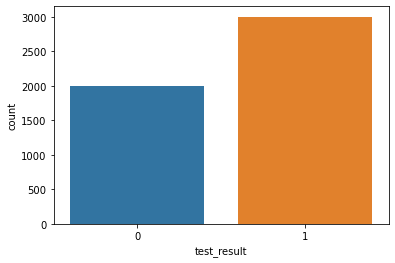

In [33]:
sns.countplot(df['test_result'])

<AxesSubplot:xlabel='test_result', ylabel='age'>

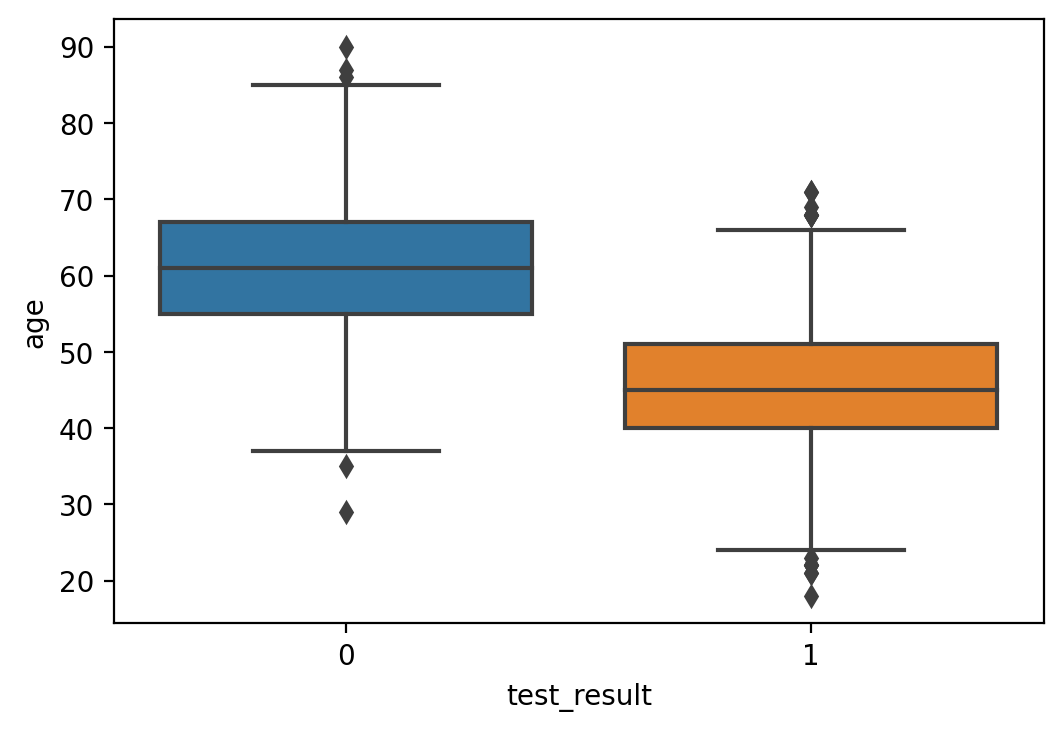

In [34]:
plt.figure(dpi=200)
sns.boxplot(x='test_result', y='age', data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

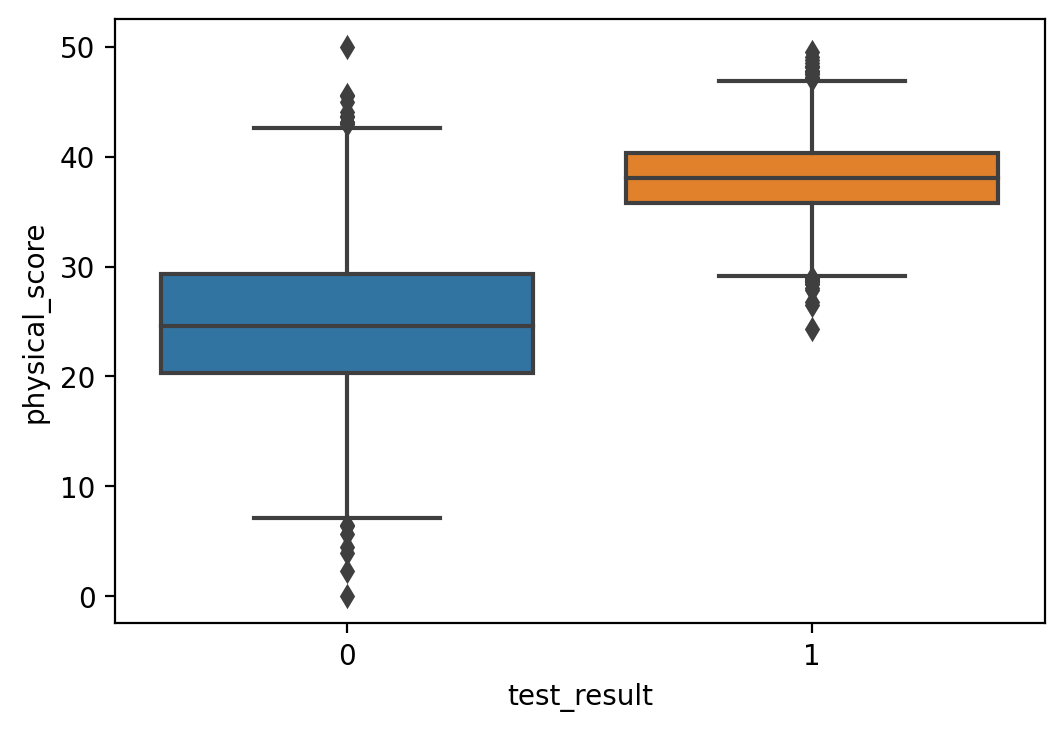

In [35]:
plt.figure(dpi=200)
sns.boxplot(x='test_result', y='physical_score', data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

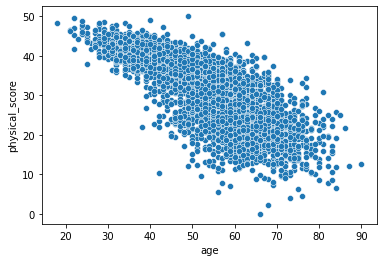

In [36]:
sns.scatterplot(x='age', y='physical_score', data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

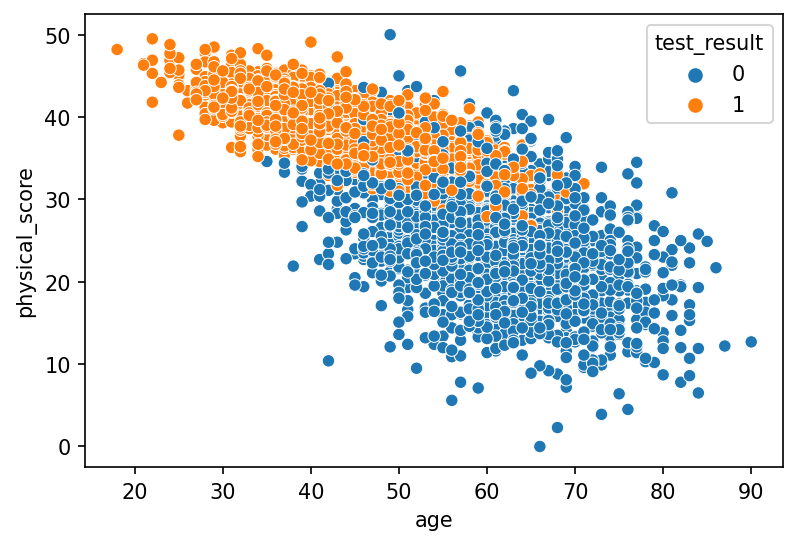

In [37]:
plt.figure(dpi=150)
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result')

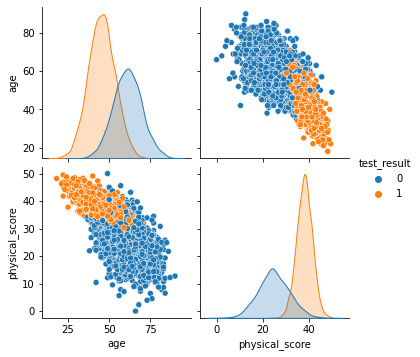

In [38]:
sns.pairplot(df, hue='test_result')

<AxesSubplot:>

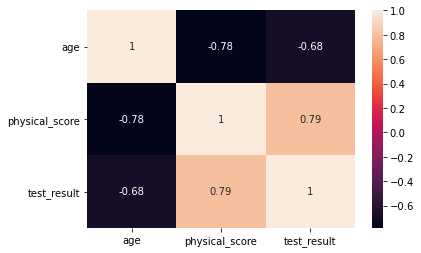

In [39]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

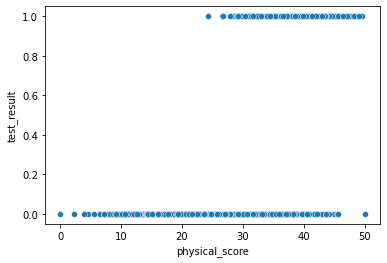

In [40]:
sns.scatterplot(x='physical_score', y='test_result', data=df)

In [41]:
from mpl_toolkits.mplot3d import Axes3D

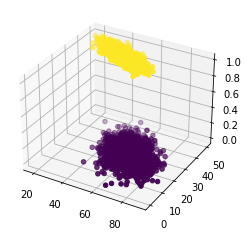

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

In [43]:
df.head()

age  physical_score  test_result
0  33.0            40.7            1
1  50.0            37.2            1
2  52.0            24.7            0
3  56.0            31.0            0
4  35.0            42.9            1

In [44]:
X = df.drop('test_result', axis=1)

In [45]:
y = df['test_result']

In [46]:
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.preprocessing import StandardScaler

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [56]:
scaler = StandardScaler()

In [58]:
scaled_X_train = scaler.fit_transform(X_train)

In [59]:
scaled_X_test = scaler.transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
#help(LogisticRegression)

In [62]:
log_model = LogisticRegression()

In [63]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [64]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [65]:
y_pred = log_model.predict(scaled_X_test)

In [67]:
y_pred = log_model.predict_proba(scaled_X_test)

In [68]:
y_pred

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [70]:
y_pred = log_model.predict(scaled_X_test)

In [72]:
accuracy_score(y_test, y_pred)

0.93

In [73]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [74]:
from sklearn.metrics import plot_confusion_matrix

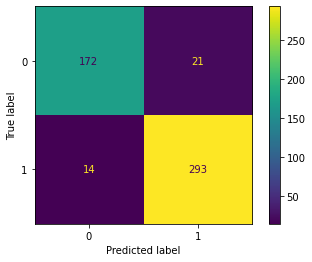

In [75]:
plot_confusion_matrix(log_model, scaled_X_test, y_test)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [78]:
from sklearn.metrics import precision_score, recall_score

In [79]:
precision_score(y_test, y_pred)

0.9331210191082803

In [80]:
recall_score(y_test, y_pred)

0.9543973941368078

In [81]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

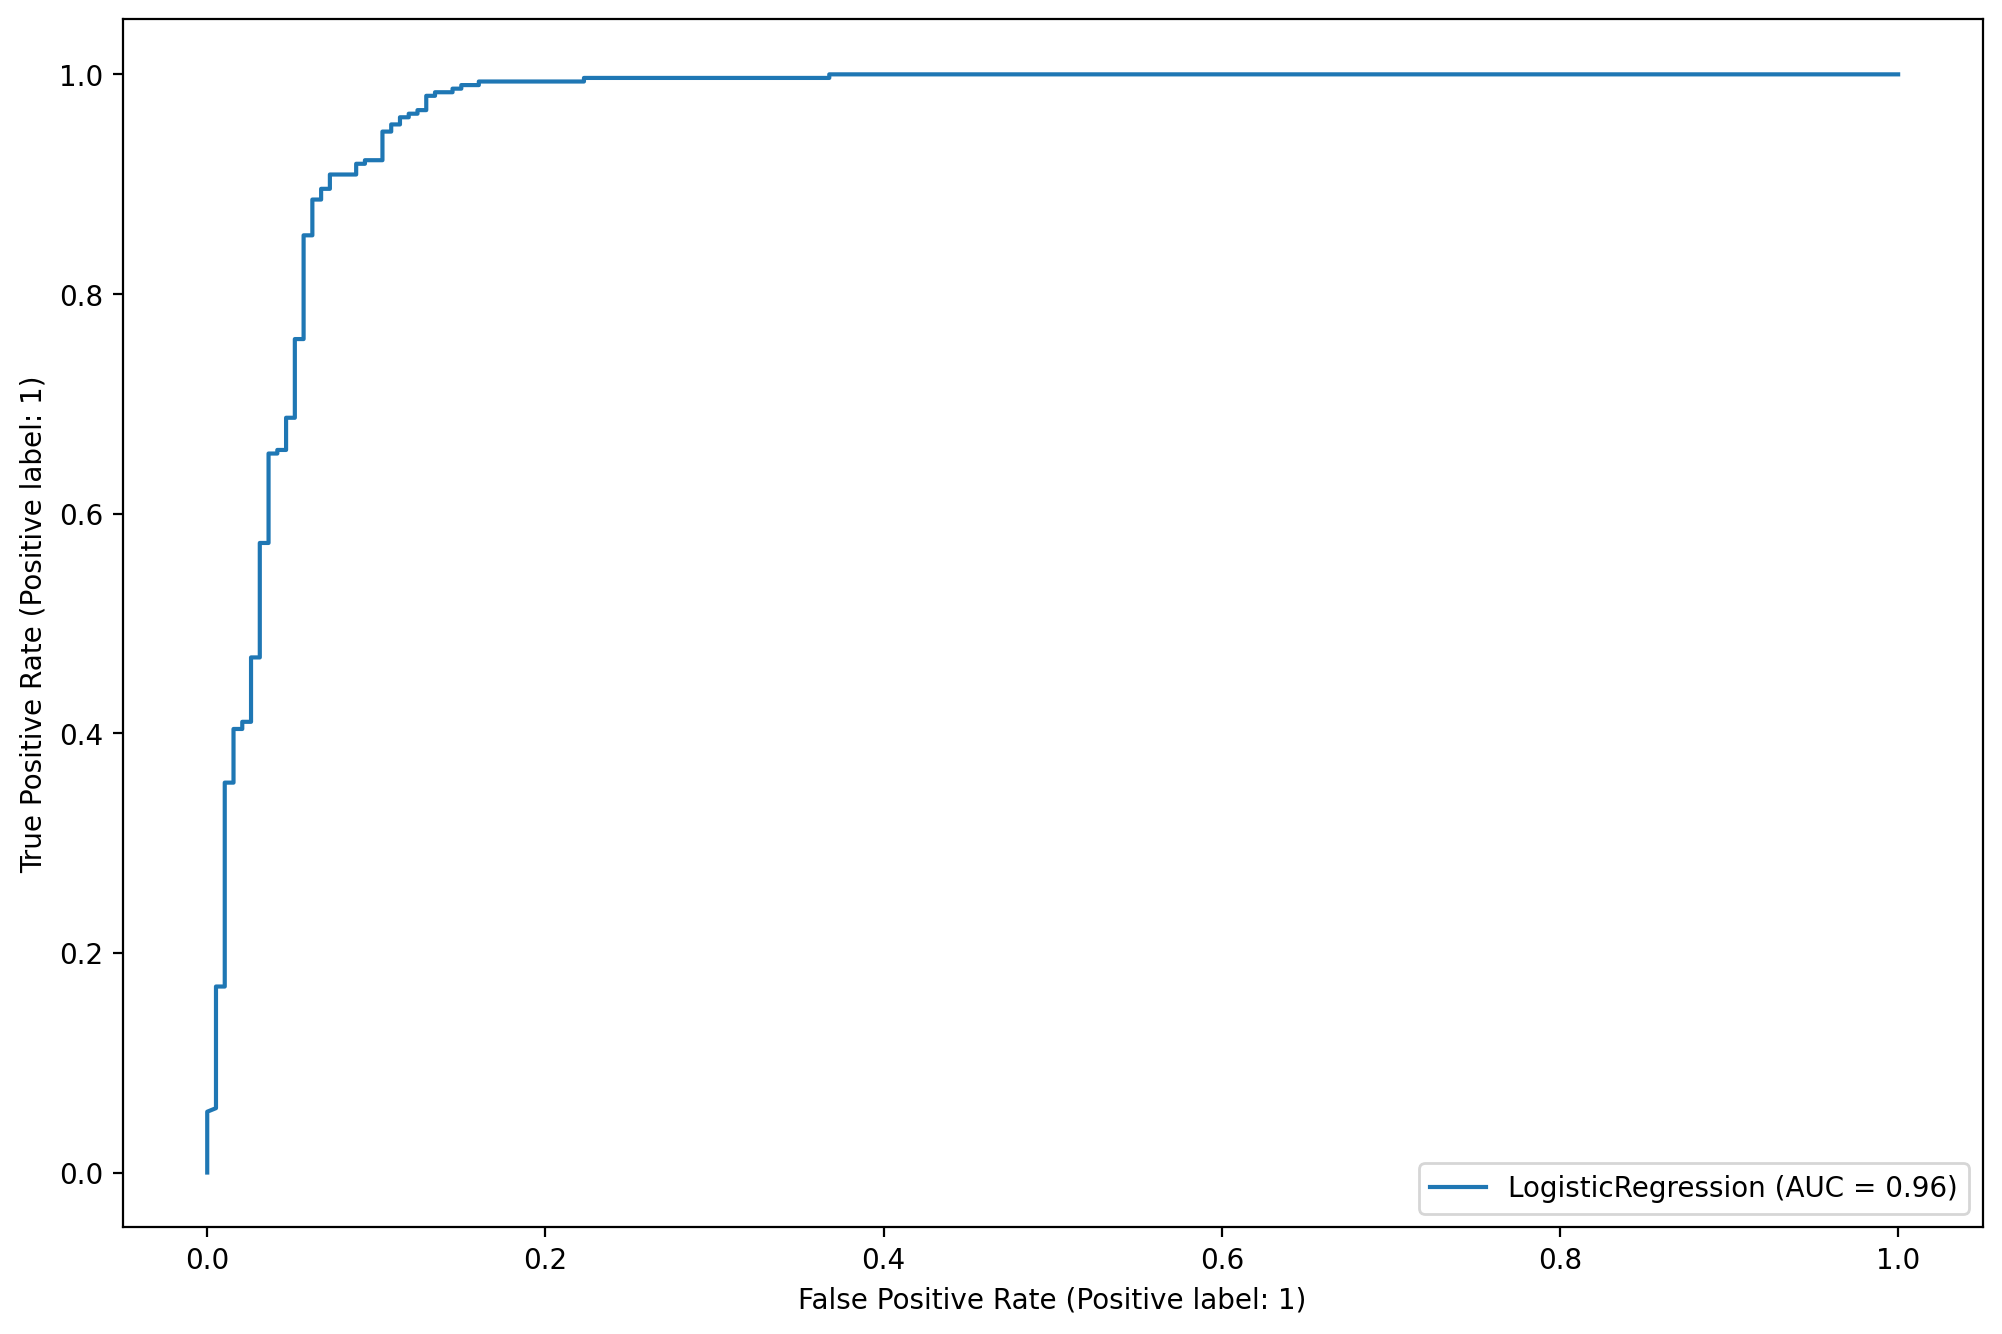

In [84]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
plot_roc_curve(log_model, scaled_X_test, y_test, ax= ax)

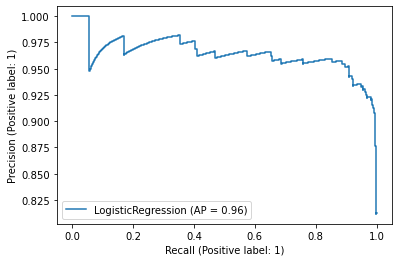

In [87]:
plot_precision_recall_curve(log_model, scaled_X_test, y_test)

In [89]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02384343, 0.97615657])

In [90]:
y_test[0]

1

In [91]:
log_model.predict(scaled_X_test)[0]

1